## Project : AirbnbnBoros 

### Team Members : Wei-Cheng, Dhruv Popat, Manasvi Prasad, Bhavin Kothari

## INTRODUCTION

#### Since the age of time, lodging business has been available so people could travel and gradually, it became eminent to drive the local economies. Airbnb a revolutionary model in the travel business, has gained popularity to a point where it is becoming a synonym for hotels, killing their business, especially for the price sensitive guests.  It is an online marketplace which lets people or hosts rent out their properties or spare rooms to guests. Since the lodging industry not only depends on the amenities on the property, but also immensely on the facilities around the property. We aiem to analyze how the kind of eateries, shopping hubs, sites for tourists, all make a significant impact on the demand of a listing and draw conclusions that proves useful on multiple levels and not only to Airbnb hosts.
#### We have successfully merged government records holding the national landmarks in the 5 boroughs that we are considering. We aim to conclude a robust analysis so that it can not only be used by Airbnb hosts, investors, real estate developers but also by government officials to determine the best location and type of a new project.

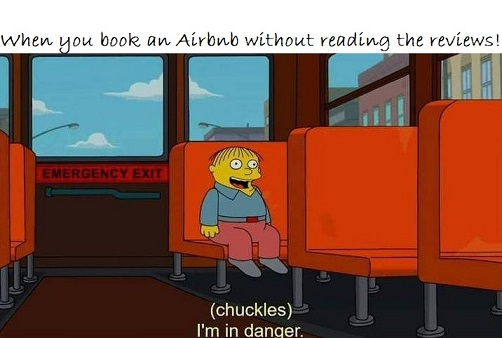

#### OBJECTIVE

#### We aim to analyze consumer behavior to conclude the factors that drive the popularity of listings. The factors we are most interested in are the keywords, types and amenities around the location of a listing. We hope to develop a robust analysis so that it can not only be used by Airbnb hosts and investors, but also by government to determine the best location and type of a new project. 
#### An underlying assumption that we have made to analyze the data points here is that the number of reviews a listing has, directly correlates to the number of customer transactions and hence, the popularity of the listing. The reasoning behind this is that a listing can not have too many bad reviews, because a place gaining unpopularity would eventually not be receiving reservations and consequently not be reviewed.

#### QUESTIONS OF INTEREST

#### At this point, we are primarily looking to analyze the impact the historic landmarks typically have on the listings, and what drives the popularity of the listings.

##### 1. What are the types of listings that people prefer in different areas?

##### 2. What kind of prices prevail in a certain location and what generates this price mechanism?

##### 3. What keyword in the listings attracts most customers?

##### 4. How the price, location, review per month affect the popularity for the listing(number of review)?

##### 5. How to predict price by using varibles?

##### 6. What area is preferred by hosts with maximum number of rooms? 


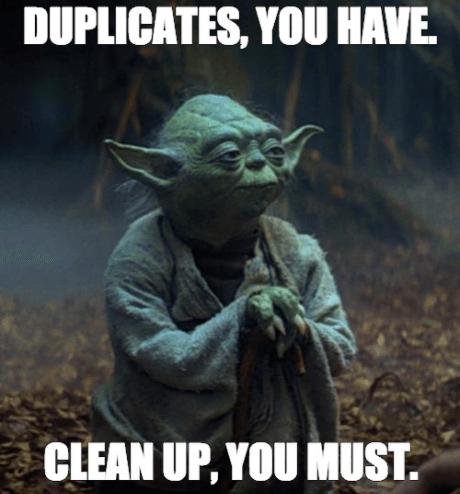

#### Our primary data set about Airbnb listings  is from Kaggle. The list of National Historic Landmarks in New York City, that we have picked from wikipedia, required cleaning and merging with our primary data set. We merge both the tables along the 'neighbourhood' column in both datasets. The neighbourhood column in our primary dataset signifies the borough the listing belongs to and the neighbourhood in the secondary dataset signifies the borough the landmark belongs to. 

#### •	Find, Merge and Clean the data: The primary dataset and the secondary dataset have been found, merged and cleaned along the desired column.  ---ADD THE DESCRIPTION 

#### One primary dataset and one secondary dataset has been successfully found and cleaned and both have been combined along the desired column. The merged data has been made more structured by dropping unnecessary columns and by reordering and renaming the remaining necessary ones. Five finalized datapoints to analyze have been finalized and some more are in consideration. So far, 2 datapoints of the 5 finalized ones have been analyzed.



### Importing packages, cause Python Programming!!



In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import plotly.graph_objects as go
mapbox_access_token = 'pk.eyJ1IjoiZGhydXZwb3BhdCIsImEiOiJjazJwZXIzMzQwM2pqM2Ntb3ZlemF6ZWd0In0.an6SvHknkXmjTfPPTafbpw'

In [2]:
#Scraping data from the Landmarks site for getting to know different landmarks in a Neighbourhood
National_parks_url = 'https://en.wikipedia.org/wiki/List_of_National_Historic_Landmarks_in_New_York_City'
National_parks = pd.read_html(National_parks_url, match = 'Landmark name')[0]


In [3]:
#Extracting the 3 columns that we are interested in
National_parks_columns = National_parks[['Landmark name', 'County', 'Location']]
National_parks_columns.head()

,Landmark name,County,Location
0,69th Regiment Armory,New York,Manhattan 40°44′30″N 73°59′01″W﻿ / ﻿40.741648°...
1,Admiral David Glasgow Farragut Gravesite,Bronx,Bronx 40°53′32″N 73°51′57″W﻿ / ﻿40.892165°N 73...
2,African Burial Ground,New York,Manhattan 40°42′52″N 74°00′16″W﻿ / ﻿40.714558°...
3,Ambrose (lightship),New York,Manhattan 40°42′17″N 74°00′09″W﻿ / ﻿40.704844°...
4,American Stock Exchange Building,New York,Manhattan 40°42′32″N 74°00′45″W﻿ / ﻿40.7090°N ...


In [4]:
#Check the data types for the columns
National_parks_columns.dtypes

Landmark name    object
County           object
Location         object
dtype: object

In [5]:
#Clean the data in column 'Location' to get the value that we needed
National_parks_columns['Location'] = National_parks_columns['Location'].str.split(' ').str[0]

C:\Users\dhruv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [6]:
#Renamning the colums of the website and get the number of landmarks in each neighbourhood_group
National_parks_columns_df = National_parks_columns.rename(columns={'County': 'neighbourhood_group'})
National_parks_columns_df = National_parks_columns_df.groupby('neighbourhood_group').count()['Location'].to_frame()


In [7]:
National_parks_columns_df = National_parks_columns_df.reset_index()

In [8]:
National_parks_columns_df['neighbourhood_group'].unique()

array(['Bronx', 'Kings', 'Kings and New York', 'New York', 'Queens',
       'Richmond (Staten Island)'], dtype=object)

In [9]:
National_parks_columns_df['neighbourhood_group'] = ['Bronx', 'Brooklyn', 
                                                 'Kings and New York', 'Manhattan', 'Queens', 
                                                 'Staten Island']

In [10]:
# The NYC airbnb data set
NYC_airbnb = pd.read_csv('python_airbnb.csv')

In [11]:
NYC_airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

### Merging the landmark data sets with NYC_airbnb

In [12]:
Join_table = NYC_airbnb.merge(National_parks_columns_df, 
                              left_on='neighbourhood_group', right_on='neighbourhood_group')
Join_table

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Location
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,9
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,9
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,10/5/2017,0.40,1,0,9
3,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,6/24/2019,1.34,3,314,9
4,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,6/29/2019,1.20,1,46,9
5,7097,Perfect for Your Parents + Garden,17571,Jane,Brooklyn,Fort Greene,40.69169,-73.97185,Entire home/apt,215,2,198,6/28/2019,1.72,1,321,9
6,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,6/22/2019,4.44,1,21,9
7,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,12/28/2011,0.07,1,0,9
8,8024,CBG CtyBGd HelpsHaiti rm#1:1-4,22486,Lisel,Brooklyn,Park Slope,40.68069,-73.97706,Private room,130,2,130,7/1/2019,1.09,6,347,9
9,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,1/1/2019,0.37,6,364,9


# Trying to find some correlation between price and number of reviews

In [13]:
df1 = Join_table[Join_table['availability_365'] != 0]
df1[['number_of_reviews','price']].corr()

,number_of_reviews,price
number_of_reviews,1.000000,-0.072919
price,-0.072919,1.000000


#### We thought price would have a strong relation with number of reviews, but we find that there is no strict correlation between them.

# What type of listings cost the most and by how much do they differ?

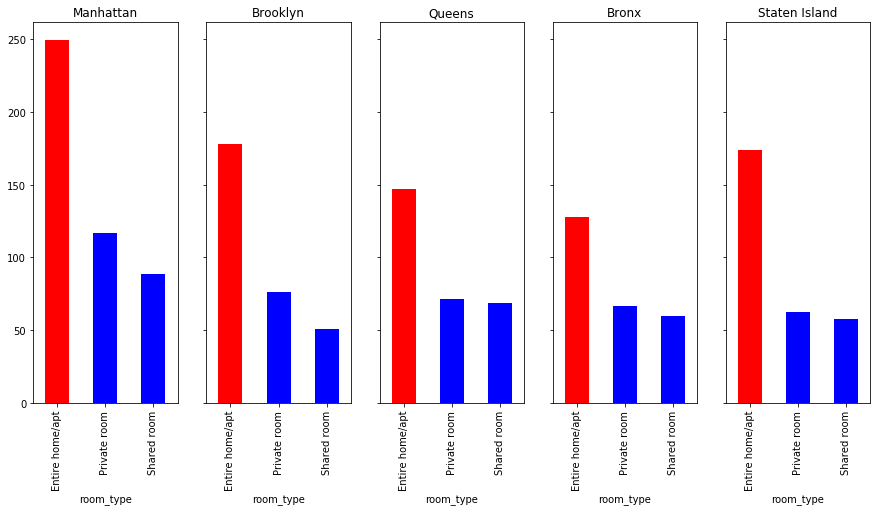

In [14]:
fig, (ax, ax1, ax2, ax3, ax7) = plt.subplots(1, 5, sharey=True, figsize=(15,7))


df1 = Join_table[Join_table['neighbourhood_group'] == 'Manhattan'].reset_index()
df2 = Join_table[Join_table['neighbourhood_group'] == 'Brooklyn'].reset_index()
df3 = Join_table[Join_table['neighbourhood_group'] == 'Queens'].reset_index()
df4 = Join_table[Join_table['neighbourhood_group'] == 'Bronx'].reset_index()
df5 = Join_table[Join_table['neighbourhood_group'] == 'Staten Island'].reset_index()

group=df1.groupby('room_type')['price'].mean().plot.bar(ax=ax, color=['r','b','b'], title = 'Manhattan')
group2=df2.groupby('room_type')['price'].mean().plot.bar(ax=ax1, color=['r','b','b'], title='Brooklyn')
group3=df3.groupby('room_type')['price'].mean().plot.bar(ax=ax2, color=['r','b','b'], title='Queens')
group4=df4.groupby('room_type')['price'].mean().plot.bar(ax=ax3, color=['r','b','b'], title='Bronx')
group5=df5.groupby('room_type')['price'].mean().plot.bar(ax=ax7, color=['r','b','b'],title='Staten Island')

#### We note that private rooms in Manhattan cost almost as much as an entire appartment in Bronx. The contrast is not very stark between types of listings in Queens and Bronx

# Preferences of People in different boroughs

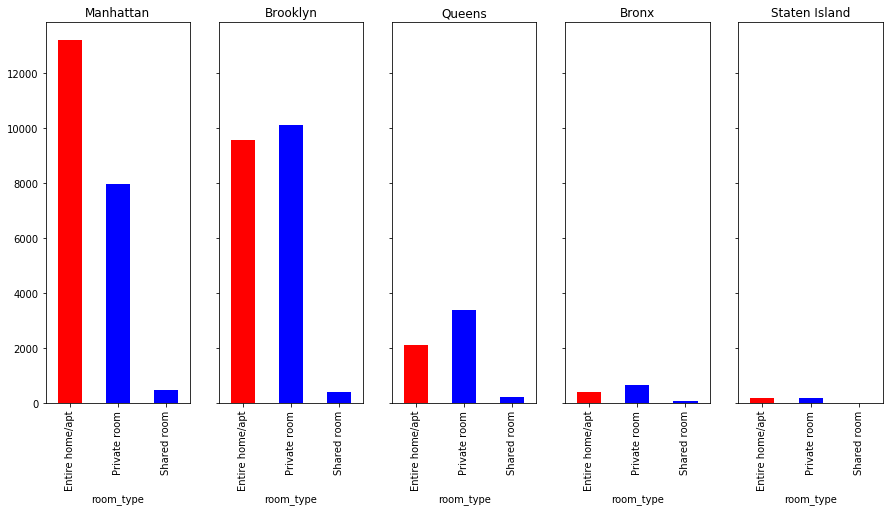

In [15]:
fig, (ax, ax1, ax2, ax3, ax7) = plt.subplots(1, 5, sharey=True, figsize=(15,7))


df1 = Join_table[Join_table['neighbourhood_group'] == 'Manhattan'].reset_index()
df2 = Join_table[Join_table['neighbourhood_group'] == 'Brooklyn'].reset_index()
df3 = Join_table[Join_table['neighbourhood_group'] == 'Queens'].reset_index()
df4 = Join_table[Join_table['neighbourhood_group'] == 'Bronx'].reset_index()
df5 = Join_table[Join_table['neighbourhood_group'] == 'Staten Island'].reset_index()

group =df1.groupby('room_type')['price'].count().plot.bar(ax=ax, color=['r','b','b'], title = 'Manhattan')
group2=df2.groupby('room_type')['price'].count().plot.bar(ax=ax1, color=['r','b','b'], title='Brooklyn')
group3=df3.groupby('room_type')['price'].count().plot.bar(ax=ax2, color=['r','b','b'], title='Queens')
group4=df4.groupby('room_type')['price'].count().plot.bar(ax=ax3, color=['r','b','b'], title='Bronx')
group5=df5.groupby('room_type')['price'].count().plot.bar(ax=ax7, color=['r','b','b'],title='Staten Island')

#### We conclude that in Manhattan people prefer Entire Apartment and in Queens and Bronx private rooms are more prevalent. Can we conclude that people travelling to Manhattan often go with friends or in groups? What do you think causes this disparity?


# The trends of high end properties in NYC - A Visual Story

In [78]:
L1 = []

for i in range(Join_table.shape[0]):
    if (Join_table['room_type'][i] == 'Private room' and Join_table['price'][i] > 250):
        L1.append(Join_table.iloc[i,:])

new_df = pd.DataFrame(L1)
new_df.head()

KeyError: 16

In [79]:

class_map_data1 = go.Scattermapbox(
    
        
        lon = new_df[new_df['neighbourhood_group']=='Brooklyn' ]['longitude'] ,
        lat = new_df[new_df['neighbourhood_group']=='Brooklyn']['latitude'] ,
        text = new_df['name'],
        hoverinfo='text',
        mode = 'markers',
        marker = dict(
                    color = 'red',
                    symbol = 'circle',
                    opacity = .5
            ),
        name = "Brooklyn"
)

class_map_data2 = go.Scattermapbox(
    
        
        lon = new_df[new_df['neighbourhood_group']== 'Bronx'] ['longitude'],
        lat = new_df[new_df['neighbourhood_group']== 'Bronx'] ['latitude'],
        text = new_df['name'],
        hoverinfo='text',
        mode = 'markers',
        marker = dict(
                    color = 'blue',
                    symbol = 'circle',
                    opacity = .5
            ),
        name = "Bronx"
)


class_map_data3 = go.Scattermapbox(
    
        
        lon = new_df[new_df['neighbourhood_group']== 'Manhattan'] ['longitude'],
        lat = new_df[new_df['neighbourhood_group']== 'Manhattan'] ['latitude'],
        text = new_df['name'],
        hoverinfo='text',
        mode = 'markers',
        marker = dict(
                    color = 'yellow',
                    symbol = 'circle',
                    opacity = .5
            ),
        name = "Manhattan"
)


class_map_data4 = go.Scattermapbox(
    
        
        lon = new_df[new_df['neighbourhood_group']== 'Queens'] ['longitude'],
        lat = new_df[new_df['neighbourhood_group']== 'Queens'] ['latitude'],
        text = new_df['name'],
        hoverinfo='text',
        mode = 'markers',
        marker = dict(
                    color = 'purple',
                    symbol = 'circle',
                    opacity = .5
            ),
        name = "Queens"
)


class_map_data5 = go.Scattermapbox(
    
        
        lon = new_df[new_df['neighbourhood_group']== 'Staten Island'] ['longitude'],
        lat = new_df[new_df['neighbourhood_group']== 'Staten Island'] ['latitude'],
        text = new_df['name'],
        hoverinfo='text',
        mode = 'markers',
        marker = dict(
                    color = 'green',
                    symbol = 'circle',
                    opacity = .5
            ),
        name = "Staten Island"
)

class_map_layout = go.Layout(
        title = 'Distribution of Private Rooms whose price is above 250 Dollars in the 5 boroughs ',
        mapbox=go.layout.Mapbox(
            accesstoken=mapbox_access_token,
            zoom=1
        )
)

class_map2 = go.Figure(data=[class_map_data1, class_map_data2,class_map_data3,class_map_data4,class_map_data5], layout=class_map_layout)
class_map2.show()




#### We can see that the most expensive houses are situated in Manhattan (Duh! Obviously)

# Do certain words in description have a better impact on the psyche of the tourist? Lets find out...

In [18]:
wordsSeries = Join_table['name'].str.split(' ')
wordsSeries

0              [Clean, &, quiet, apt, home, by, the, park]
1                    [Cozy, Entire, Floor, of, Brownstone]
2                                        [BlissArtsSpace!]
3        [Lovely, Room, 1,, Garden,, Best, Area,, Legal...
4                  [Only, 2, stops, to, Manhattan, studio]
5                 [Perfect, for, Your, Parents, +, Garden]
6        [Hip, Historic, Brownstone, Apartment, with, B...
7                   [Sweet, and, Spacious, Brooklyn, Loft]
8                      [CBG, CtyBGd, HelpsHaiti, rm#1:1-4]
9                            [CBG, Helps, Haiti, Room#2.5]
10                             [CBG, Helps, Haiti, Rm, #2]
11             [MAISON, DES, SIRENES1,bohemian, apartment]
12                [Sunny, Bedroom, Across, Prospect, Park]
13                [Loft, in, Williamsburg, Area, w/, Roof]
14                              [Large, B&B, Style, rooms]
15       [Lovely, room, 2, &, garden;, Best, area,, Leg...
16                       [Clean, and, Quiet, in, Brookly

In [19]:
wordsSeries = wordsSeries.dropna()

In [20]:
dic = {}
for words in wordsSeries:
    for word in words:
        if word not in dic:
            dic[word] = 1
        else:
            dic[word] += 1
        
        

In [21]:
import operator
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1), reverse = True)

<Figure size 720x432 with 0 Axes>

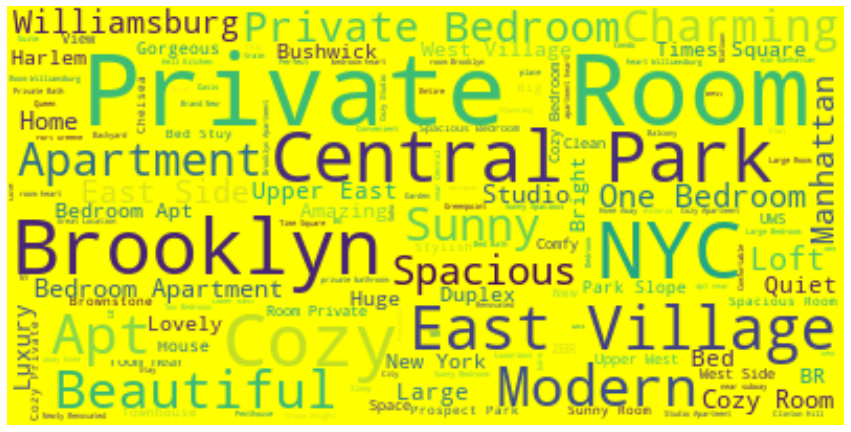

In [22]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in Join_table.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="yellow").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
sorted_dic

[('in', 15796),
 ('Private', 4967),
 ('Room', 4803),
 ('room', 4165),
 ('Bedroom', 4124),
 ('Cozy', 3812),
 ('Apartment', 3633),
 ('to', 3560),
 ('Brooklyn', 3471),
 ('1', 3354),
 ('2', 3076),
 ('the', 2857),
 ('bedroom', 2849),
 ('of', 2844),
 ('with', 2832),
 ('&', 2818),
 ('Spacious', 2777),
 ('and', 2764),
 ('Studio', 2709),
 ('East', 2676),
 ('Manhattan', 2603),
 ('Park', 2350),
 ('apartment', 2314),
 ('-', 2254),
 ('Williamsburg', 2179),
 ('Apt', 2090),
 ('Sunny', 2047),
 ('Beautiful', 1942),
 ('Village', 1867),
 ('', 1815),
 ('NYC', 1765),
 ('private', 1684),
 ('Central', 1512),
 ('Large', 1499),
 ('near', 1494),
 ('from', 1468),
 ('West', 1356),
 ('Modern', 1335),
 ('1BR', 1289),
 ('Loft', 1283),
 ('a', 1272),
 ('Luxury', 1250),
 ('apt', 1189),
 ('Upper', 1188),
 ('for', 1154),
 ('Charming', 1128),
 ('w/', 1118),
 ('heart', 1113),
 ('Bright', 1104),
 ('Side', 1098),
 ('New', 1059),
 ('Bushwick', 1058),
 ('+', 1029),
 ('Home', 1005),
 ('|', 963),
 ('3', 961),
 ('on', 956),
 ('Mi

In [24]:
MostFrequencyKeywords = ['Private','Brooklyn','Cozy','East','Studio','Spacious',
                         'Park','Williamsburg','Manhattan','Sunny','Village','Beautiful','Central',
                         'West','Large','Loft','Modern','Upper','Luxury','Side',
                         'Charming','heart','Bushwick','Bright']
# Etrack attractive description key words which appear more than 1000 times



In [25]:
Join_table

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Location
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,9
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,9
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,10/5/2017,0.40,1,0,9
3,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,6/24/2019,1.34,3,314,9
4,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,6/29/2019,1.20,1,46,9
5,7097,Perfect for Your Parents + Garden,17571,Jane,Brooklyn,Fort Greene,40.69169,-73.97185,Entire home/apt,215,2,198,6/28/2019,1.72,1,321,9
6,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,6/22/2019,4.44,1,21,9
7,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,12/28/2011,0.07,1,0,9
8,8024,CBG CtyBGd HelpsHaiti rm#1:1-4,22486,Lisel,Brooklyn,Park Slope,40.68069,-73.97706,Private room,130,2,130,7/1/2019,1.09,6,347,9
9,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,1/1/2019,0.37,6,364,9


In [26]:
nameReivew = Join_table[['id', 'name', 'reviews_per_month']]

In [27]:
nameReivew.head()

,id,name,reviews_per_month
0,2539,Clean & quiet apt home by the park,0.21
1,3831,Cozy Entire Floor of Brownstone,4.64
2,5121,BlissArtsSpace!,0.40
3,5803,"Lovely Room 1, Garden, Best Area, Legal rental",1.34
4,6848,Only 2 stops to Manhattan studio,1.20


In [28]:
nameReivew = nameReivew.dropna()

In [29]:
nameReivew = nameReivew.reset_index(drop = True)

In [30]:
len(MostFrequencyKeywords)

24

In [31]:
dictOfWords = { i : [] for i in MostFrequencyKeywords }

In [32]:
nameReivew['name'] = nameReivew['name'].str.split(' ')

In [33]:
for i in range(len(nameReivew['name'])):
        for keyword in MostFrequencyKeywords:
            if keyword in nameReivew['name'][i]:
                dictOfWords[keyword].append(nameReivew['reviews_per_month'][i])

In [34]:
dictOfWords

{'Private': [0.23,
  3.02,
  3.2,
  0.77,
  3.04,
  0.65,
  0.46,
  0.15,
  0.5,
  0.36,
  0.16,
  6.7,
  0.54,
  0.16,
  0.99,
  1.32,
  1.57,
  0.04,
  0.59,
  0.42,
  0.29,
  0.13,
  0.05,
  3.18,
  0.82,
  2.75,
  0.7,
  0.06,
  0.07,
  0.02,
  0.39,
  2.54,
  0.06,
  0.48,
  1.05,
  0.16,
  1.46,
  0.17,
  0.92,
  0.16,
  1.67,
  0.64,
  2.07,
  0.44,
  0.33,
  0.94,
  3.07,
  0.03,
  0.22,
  0.45,
  0.21,
  0.02,
  3.04,
  0.01,
  0.23,
  2.08,
  1.22,
  0.39,
  0.09,
  4.3,
  0.19,
  0.61,
  1.49,
  0.06,
  0.08,
  3.27,
  2.72,
  0.62,
  1.75,
  0.02,
  0.02,
  0.52,
  0.11,
  0.19,
  2.87,
  0.06,
  0.22,
  0.74,
  2.09,
  0.17,
  2.67,
  0.13,
  1.22,
  0.15,
  1.25,
  0.56,
  0.35,
  0.45,
  0.56,
  2.89,
  1.25,
  1.85,
  1.23,
  0.44,
  1.17,
  0.05,
  2.01,
  1.64,
  2.08,
  1.61,
  4.43,
  0.06,
  0.29,
  0.2,
  0.72,
  0.04,
  3.53,
  3.45,
  3.31,
  2.36,
  0.9,
  1.05,
  0.12,
  0.49,
  0.99,
  3.42,
  2.0,
  1.93,
  0.03,
  1.37,
  1.11,
  0.32,
  1.55,
  0.16,
  0.1

In [35]:
for keyword in dictOfWords:
    dictOfWords[keyword] = sum(dictOfWords[keyword])/len(dictOfWords[keyword])

In [36]:
dictOfWords

{'Private': 1.6672492552135085,
 'Brooklyn': 1.2967902946273835,
 'Cozy': 1.4868643533123058,
 'East': 1.1243124999999985,
 'Studio': 1.225477528089885,
 'Spacious': 1.093484646194924,
 'Park': 1.3390996784565898,
 'Williamsburg': 1.029652025099829,
 'Manhattan': 1.6153231939163528,
 'Sunny': 1.0504221165279417,
 'Village': 1.00542800265428,
 'Beautiful': 1.2678580645161273,
 'Central': 1.6136567164179088,
 'West': 0.953128103277061,
 'Large': 1.051615320566193,
 'Loft': 1.0424311490978153,
 'Modern': 1.4621062271062277,
 'Upper': 1.0367185761957733,
 'Luxury': 1.2473290598290592,
 'Side': 1.0943550295857989,
 'Charming': 1.2054754098360634,
 'heart': 1.285463800904976,
 'Bushwick': 1.2145668316831688,
 'Bright': 1.196271739130435}

In [37]:
key = list(dictOfWords.keys())

In [38]:
value = list(dictOfWords.values())

Text(0.5, 1.0, 'Key words with reviews per month ')

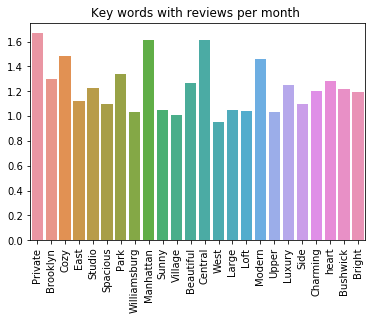

In [39]:

sns.barplot(x=key, y= value)
plt.xticks(rotation=90)
plt.title("Key words with reviews per month ")

In [40]:
avg = sum(nameReivew['reviews_per_month'])/len(nameReivew['reviews_per_month'])

In [41]:
avg

1.3734098926281644

In [42]:
for i in dictOfWords:
    if dictOfWords[i] > avg:
        print('When {} is in the description, average reviews per month go to {}'.format(i, dictOfWords[i]))


When Private is in the description, average reviews per month go to 1.6672492552135085
When Cozy is in the description, average reviews per month go to 1.4868643533123058
When Manhattan is in the description, average reviews per month go to 1.6153231939163528
When Central is in the description, average reviews per month go to 1.6136567164179088
When Modern is in the description, average reviews per month go to 1.4621062271062277


# How the price affect the popularity for the listing(number of review)?

In [43]:
Join_table

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Location
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,9
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,9
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,10/5/2017,0.40,1,0,9
3,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,6/24/2019,1.34,3,314,9
4,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,6/29/2019,1.20,1,46,9
5,7097,Perfect for Your Parents + Garden,17571,Jane,Brooklyn,Fort Greene,40.69169,-73.97185,Entire home/apt,215,2,198,6/28/2019,1.72,1,321,9
6,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,6/22/2019,4.44,1,21,9
7,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,12/28/2011,0.07,1,0,9
8,8024,CBG CtyBGd HelpsHaiti rm#1:1-4,22486,Lisel,Brooklyn,Park Slope,40.68069,-73.97706,Private room,130,2,130,7/1/2019,1.09,6,347,9
9,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,1/1/2019,0.37,6,364,9


In [44]:
%pylab inline
import datetime as dt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib


C:\Users\waifj\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy



In [45]:
Join_table['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [46]:
Join_table = Join_table.dropna()

In [47]:
Join_table['price_bin'] = pd.cut(x=Join_table['price'], bins=[0,69,106,175,10000])

C:\Users\waifj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [48]:
Join_table

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Location,price_bin
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,9,"(106, 175]"
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,9,"(69, 106]"
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,10/5/2017,0.40,1,0,9,"(0, 69]"
3,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,6/24/2019,1.34,3,314,9,"(69, 106]"
4,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,6/29/2019,1.20,1,46,9,"(106, 175]"
5,7097,Perfect for Your Parents + Garden,17571,Jane,Brooklyn,Fort Greene,40.69169,-73.97185,Entire home/apt,215,2,198,6/28/2019,1.72,1,321,9,"(175, 10000]"
6,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,6/22/2019,4.44,1,21,9,"(69, 106]"
7,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,12/28/2011,0.07,1,0,9,"(175, 10000]"
8,8024,CBG CtyBGd HelpsHaiti rm#1:1-4,22486,Lisel,Brooklyn,Park Slope,40.68069,-73.97706,Private room,130,2,130,7/1/2019,1.09,6,347,9,"(106, 175]"
9,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,1/1/2019,0.37,6,364,9,"(69, 106]"


# Graph of number of reviews by Price range in different neighbourhood groups

Text(0.5, 1.0, 'Reviews per month vs Price(by Cut) in different neighbourhood group')

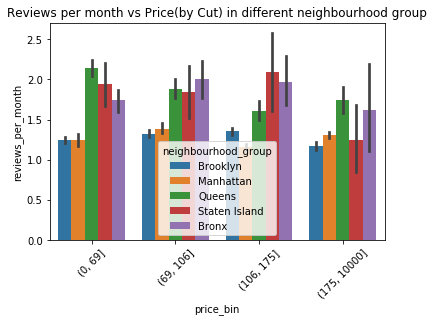

In [49]:
sns.barplot(x=Join_table['price_bin'], y=Join_table['reviews_per_month'], hue=Join_table['neighbourhood_group']);
plt.xticks(rotation=45);
plt.title("Reviews per month vs Price(by Cut) in different neighbourhood group")

# Predict price by using Linear Regression

In [50]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [51]:
Join_table = Join_table.rename(columns={'name': 'Description', 'id':'RoomId','Location':'Numbers of Landmark in neighbourhood_group' })


In [52]:
df = Join_table.copy()
df.head()

,RoomId,Description,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Numbers of Landmark in neighbourhood_group,price_bin
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,9,"(106, 175]"
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,9,"(69, 106]"
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,10/5/2017,0.40,1,0,9,"(0, 69]"
3,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,6/24/2019,1.34,3,314,9,"(69, 106]"
4,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,6/29/2019,1.20,1,46,9,"(106, 175]"


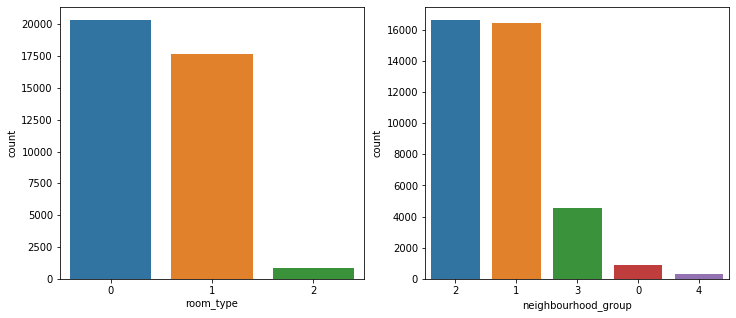

In [53]:
#Convert the room types and neighbourhood groups to numerical categorical data.
df['room_type'] = df['room_type'].astype('category').cat.codes
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category').cat.codes
f, axs = plt.subplots(1,2, figsize=(12,5))
sns.countplot(df['room_type'], ax=axs[0], order=df['room_type'].value_counts().index)
sns.countplot(df['neighbourhood_group'],order=df['neighbourhood_group'].value_counts().index, ax=axs[1])

### Many owners don't rent out their properties for even a single day in an year.
### It's unlikely that owners that don't bother to rent out their homes even once a year are updated with the prices,  so we will remove them from our considerations.

In [54]:
print(df.shape)
df = df[df['availability_365']!=0]
print(df.shape) #New DF shape

(38821, 18)
(26146, 18)


In [55]:
df.head()

,RoomId,Description,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Numbers of Landmark in neighbourhood_group,price_bin
0,2539,Clean & quiet apt home by the park,2787,John,1,Kensington,40.64749,-73.97237,1,149,1,9,10/19/2018,0.21,6,365,9,"(106, 175]"
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,Clinton Hill,40.68514,-73.95976,0,89,1,270,7/5/2019,4.64,1,194,9,"(69, 106]"
3,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,1,South Slope,40.66829,-73.98779,1,89,4,167,6/24/2019,1.34,3,314,9,"(69, 106]"
4,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,1,Williamsburg,40.70837,-73.95352,0,140,2,148,6/29/2019,1.20,1,46,9,"(106, 175]"
5,7097,Perfect for Your Parents + Garden,17571,Jane,1,Fort Greene,40.69169,-73.97185,0,215,2,198,6/28/2019,1.72,1,321,9,"(175, 10000]"


In [56]:
df.drop(['RoomId', 'Description', 'host_id', 'host_name', 'neighbourhood', 'last_review'], axis=1, inplace=True)



### We will drop features that are unlikely to affect the price - ID, name, host_id, host_name. We will also drop features that have largely incomplete data - last_review, reviews_per_month or have too many categories - neighbourhood.

In [57]:
df.drop(['price_bin'], axis=1, inplace=True)

In [58]:
df.head()S

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Numbers of Landmark in neighbourhood_group
0,1,40.64749,-73.97237,1,149,1,9,0.21,6,365,9
1,1,40.68514,-73.95976,0,89,1,270,4.64,1,194,9
3,1,40.66829,-73.98779,1,89,4,167,1.34,3,314,9
4,1,40.70837,-73.95352,0,140,2,148,1.20,1,46,9
5,1,40.69169,-73.97185,0,215,2,198,1.72,1,321,9


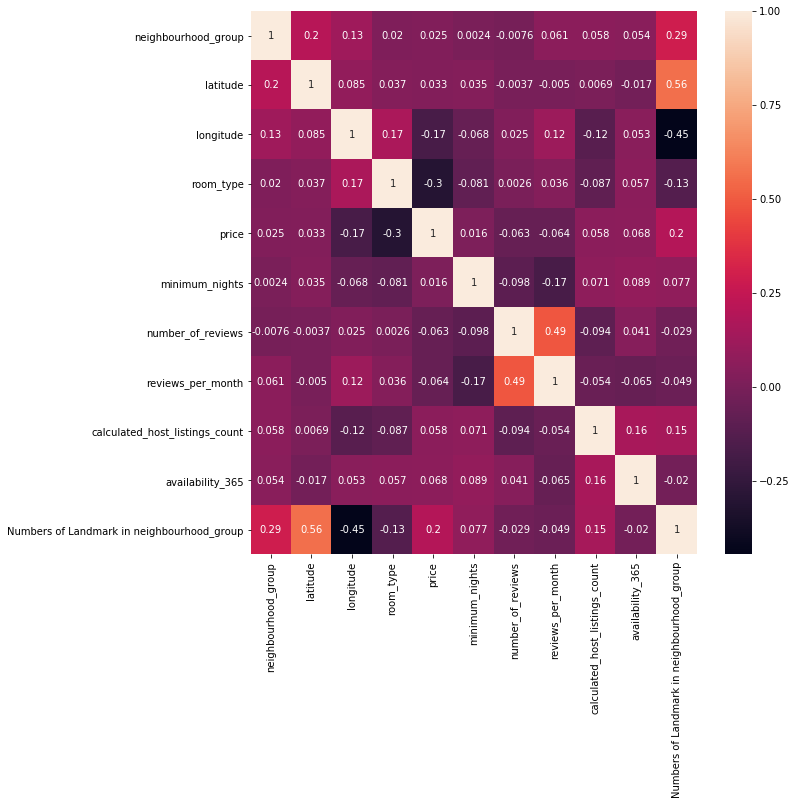

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().round(4), annot=True)

### Heatmap to check the disturbing factor of intermediate variables

In [60]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
Y = df['price']
X = df[['neighbourhood_group', 'longitude', 'room_type', 'availability_365', 'calculated_host_listings_count',
        'Numbers of Landmark in neighbourhood_group', 'reviews_per_month','latitude','number_of_reviews']]
X = preprocessing.normalize(X)
X = np.hstack((np.ones( (len(df['price']) ,1)), X))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20916, 10)
(5230, 10)
(20916,)
(5230,)


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

lin_model = LinearRegression().fit(X_train, Y_train)

In [62]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 190.96185701119785
R2 score is 0.09554683274155762


The model performance for testing set
--------------------------------------
RMSE is 181.61269706397533
R2 score is 0.09431659891400479


 Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction
    

In [63]:
error_frame = pd.DataFrame({'Actual': np.array(Y_test).flatten(), 'Predicted': y_test_predict.flatten()})
error_frame.head(10)

,Actual,Predicted
0,180,153.222823
1,115,167.863336
2,75,137.169350
3,139,158.981741
4,150,180.464140
5,65,135.518099
6,96,133.581936
7,165,161.081277
8,90,211.738578
9,200,252.555243


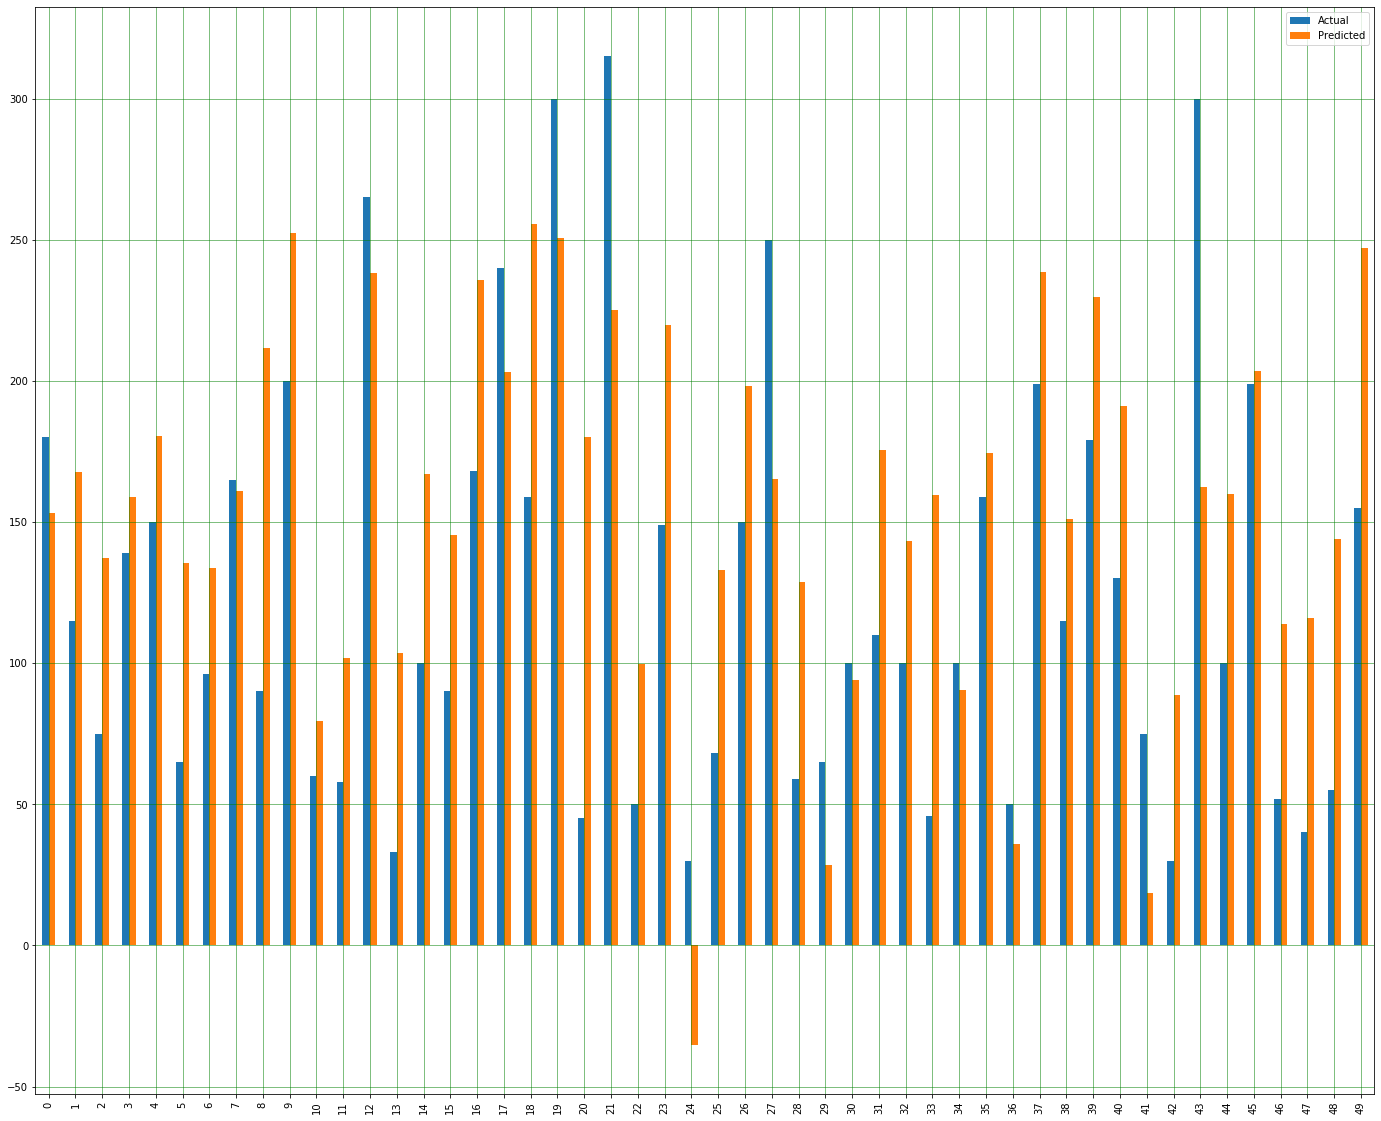

In [64]:
df1 = error_frame[:50]
df1.plot(kind='bar',figsize=(24,20))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Since Our R2 score is very bad, our model is not perfect. So we remove outliers and try to fit it again.

In [65]:
#We will use the IQR metric to remove outliers, then fit again.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [66]:
IQR_df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
IQR_df.shape

(15945, 11)

In [67]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Numbers of Landmark in neighbourhood_group
0,1,40.64749,-73.97237,1,149,1,9,0.21,6,365,9
1,1,40.68514,-73.95976,0,89,1,270,4.64,1,194,9
3,1,40.66829,-73.98779,1,89,4,167,1.34,3,314,9
4,1,40.70837,-73.95352,0,140,2,148,1.20,1,46,9
5,1,40.69169,-73.97185,0,215,2,198,1.72,1,321,9


In [68]:
Y = IQR_df['price']
X = IQR_df[['neighbourhood_group', 'longitude', 'room_type', 'availability_365', 'calculated_host_listings_count',
        'Numbers of Landmark in neighbourhood_group', 'reviews_per_month','latitude','number_of_reviews']]
X = preprocessing.normalize(X)
X = np.hstack((np.ones( (len(IQR_df['price']) ,1)), X))


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(12756, 10)
(3189, 10)
(12756,)
(3189,)


In [69]:
lin_model = LinearRegression().fit(X_train, Y_train)
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 53.87124912581852
R2 score is 0.38272350261243493


The model performance for testing set
--------------------------------------
RMSE is 53.882421327659436
R2 score is 0.39661794225937597


In [70]:
error_frame = pd.DataFrame({'Actual': np.array(Y_test).flatten(), 'Predicted': y_test_predict.flatten()})
error_frame.head(10)

,Actual,Predicted
0,55,83.236460
1,39,90.809313
2,100,113.630223
3,249,126.829845
4,175,130.485686
5,325,127.947233
6,100,133.697174
7,299,157.008284
8,100,105.648518
9,65,58.025548


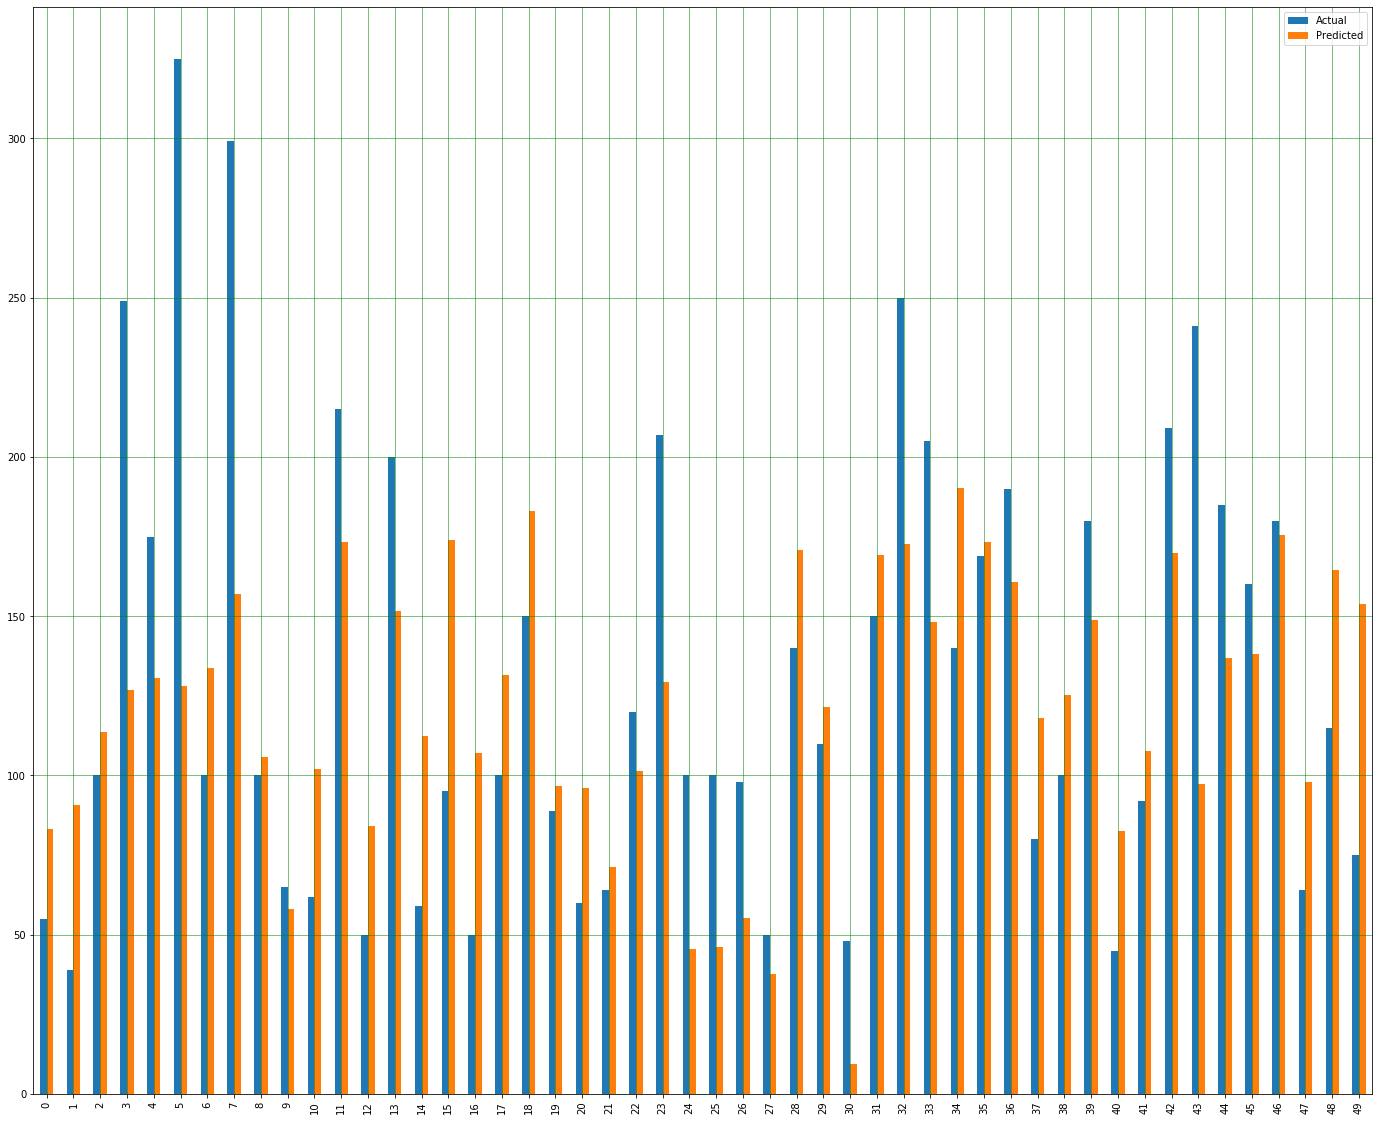

In [71]:
df1 = error_frame[:50]
df1.plot(kind='bar',figsize=(24,20))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# This model is much better than before as R2 value is higher and Actual and Predicted model have much better fitting


## Finding top hosts and which borough they prefer 

In [ ]:
import plotly.graph_objects as go

temp = Join_table.host_id.value_counts().reset_index().head(20)
temp.columns = ['host_id', 'count']
temp = temp.merge(Join_table[['host_id','host_name']], left_on = 'host_id',right_on = 'host_id', how = 'left', copy = False)
temp.drop_duplicates(inplace = True)

x = temp['host_name']
y = temp['count']

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x,y=y)])
# Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Top Airbnb hosts in NYC')
fig.layout.xaxis.title = 'Hosts'
fig.layout.yaxis.title = 'Host listings'
fig.show()

In [2]:
import plotly.express as px
## Setting the DataFrame
temp = Join_table.host_id.value_counts().reset_index().head(5)
temp.columns = ['host_id', 'count']
temp = temp.merge(Join_table[['host_id','host_name','price', 'latitude','longitude']], left_on = 'host_id',right_on = 'host_id', how = 'left', copy = False)

## Setting up the Visualization..
fig = px.scatter_mapbox(temp, 
                        lat="latitude", 
                        lon="longitude", 
                        color="host_name", 
                        size="price",
                        size_max=30, 
                        opacity = .70,
                        zoom=11,
                       )

fig.layout.mapbox.style = 'carto-positron'
fig.update_layout(title_text = 'Top 5 hosts and their hosted Locations<br>(Click legend to toggle hosts)', height = 800)

fig.show()

NameError: name 'Join_table' is not defined

# Upon analysing the map, we come to  the conclusion that people prefer to rent out their home more in Manhattan and the bubble size indicates that most of the money earned by the top host-Sonder is by renting houses in Downtown Manhattan.